# Exploratory Data Analysis on IPL Matches

## Interesting insights into Indian Premier League matches (2008–2019)

The dataset consist of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion (US$6.7 billion). So let’s analyze IPL through stats.

### Objectives:

* To find the team that won the most number of matches in a season.
* To find the team that lost the most number of matches in a season.
* Does winning toss increases the chances of victory.
* To find the player with the most player of the match awards.
* To find the city that hosted the maximum number of IPL matches.
* To find the most winning team for each season.
* To find the on-field umpire with the maximum number of IPL matches.
* To find the biggest victories in IPL while defending a total and while chasing a total.

To have a detailed understanding of Exploratory Data Analysis(EDA), I recommend you to visit my blog:

### Data Preparation and Cleaning

Let’s start by reading the csv file to Pandas DataFrame.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
ipl_matches_df = pd.read_csv('matches.csv')

In [2]:
ipl_matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


So there are 756 rows and 18 columns. 756 rows imply that there were 756 IPL matches held between 2008 and 2019.

In [3]:
ipl_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
ipl_matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations:

The following inferences can be made from the describe() method:

* The .csv file has data of IPL matches starting from the season 2008 to 2019.
* The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
* The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
* 75% of the victorious teams that bat first won by a margin of 19 runs.
* 75% of the victorious teams that bat second won by a margin of 6 wickets.
* There were 756 IPL matches hosted from 2008 to 2019.

In [5]:
ipl_matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

Let’s view the unique values of each column to help us understand the dataset better.

In [6]:
for col in ipl_matches_df:
    print(ipl_matches_df[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

The dataset has 18 columns. Let’s get acquainted with the columns.

* id: The IPL match id.
* season: The IPL season
* city: The city where the IPL match was held.
* date: The date on which the match was held.
* team1: One of the teams of the IPL match
* team2: The other team of the IPL match
* toss_winner: The team that won the toss
* toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
* result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
* dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
* winner: The winner of the match.
* win_by_runs: Provides the runs by which the team batting first won
* win_by_runs: Provides the number of wickets by which the team batting second won.
* player_of_match: The outstanding player of the match.
* venue: The venue where the match was hosted.
* umpire1: One of the two on-field umpires who officiate the match.
* umpire2: One of the two on-field umpires who officiate the match.
* umpire3: The off-field umpire who officiates the match

A mere glance of the DataFrame through its columns indicates the presence of NaN values in the ‘umpire3’ column. Let’s see the count of NaN values in the column.

In [7]:
#the first index that doesn't contain a NaN value 
ipl_matches_df.umpire3.first_valid_index()

636

In [8]:
#Confirming the first valid index
ipl_matches_df.loc[633:640]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


It’s imperative to know the count of NaN values for each column before we proceed further.

In [9]:
ipl_matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

The column ‘umpire3’ has a significant number of NaN values. As the off-field umpire parameter is insignificant, we can drop this column. The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and are very few in number(<=7).

In [10]:
ipl_matches_df = ipl_matches_df.drop(columns=['umpire3'], axis=1)

## Exploratory Analysis and Visualization

Now that our data set has been cleaned up, it’s time to do the in-depth analysis and visualization.

Let’s begin by importingmatplotlib.pyplot and seaborn.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### The team with the most number of wins per season.

Each IPL season has a fair share of excitement and adulation. No team other than Chennai Super Kings(in 2010 and 2011) was able to win the IPL trophy in succession. That is a testimony to the unpredictability of IPL.

Let’s analyze the team with the most wins in each season.

In [12]:
teams_per_season = ipl_matches_df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [13]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [14]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


The number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

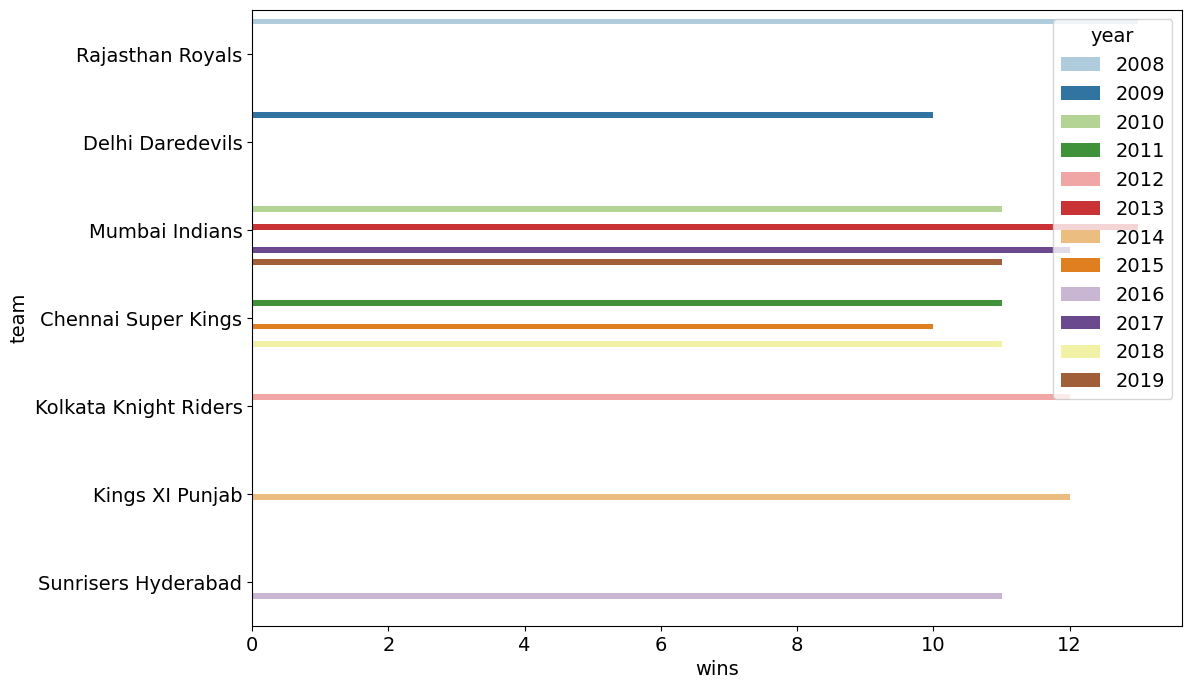

In [16]:
sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired');

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

### Observations:

* Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

### The venue that hosted the maximum number of matches


In [17]:
venue_ser = ipl_matches_df['venue'].value_counts()

In [18]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

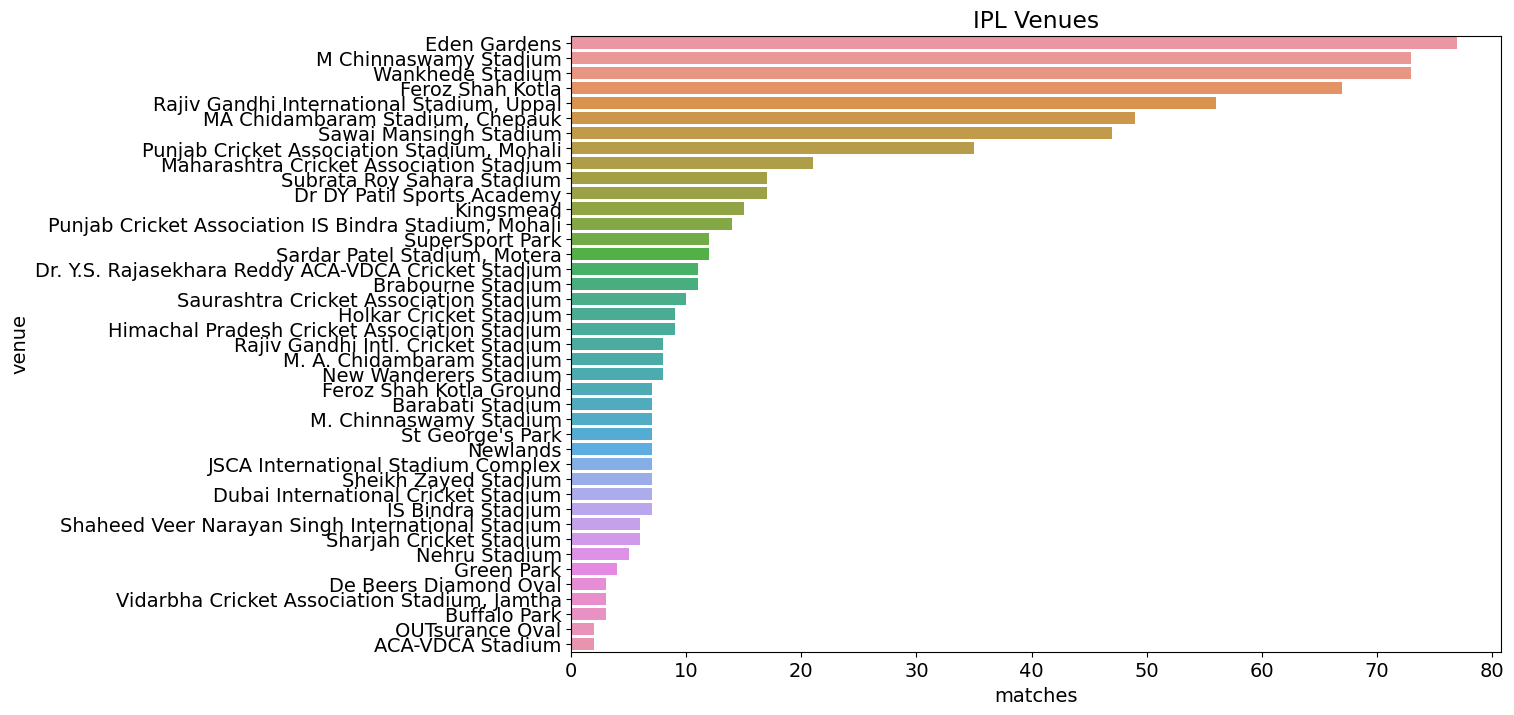

In [19]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [20]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


### Observations:

* Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
* Till 2019, IPL matches were hosted by 40 venues.

### The most successful IPL team

In a game of sports, every team competes for victory. Hence, the team that has registered the most number of victories is the most successful.



In [21]:
team_wins_ser = ipl_matches_df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [23]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


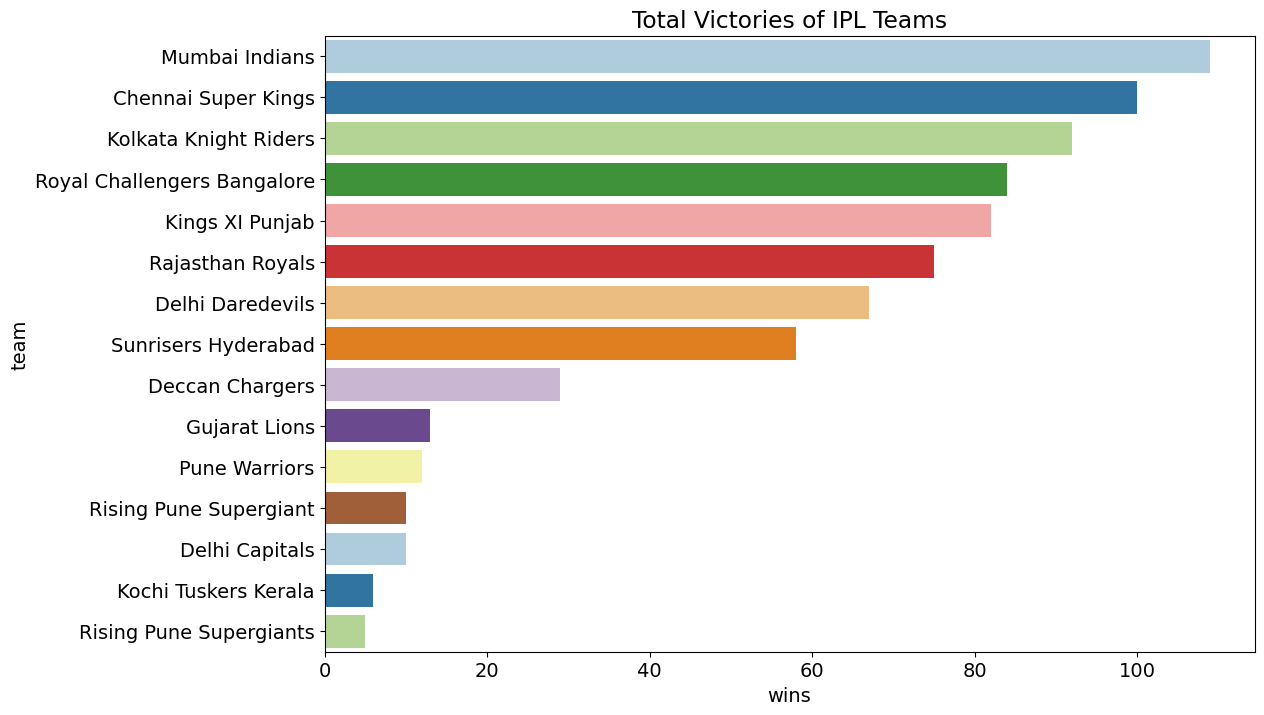

In [24]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

### Observations:

* Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

## Most Valuable Player
Winning matters the most in a competitive league match. If a player makes the most significant contribution to his team’s victory, then he’s chosen as the player_of_match. The player who has won the player_of_match title on most occasions is the most valuable player.

In [25]:
mvp_ser = ipl_matches_df['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [26]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


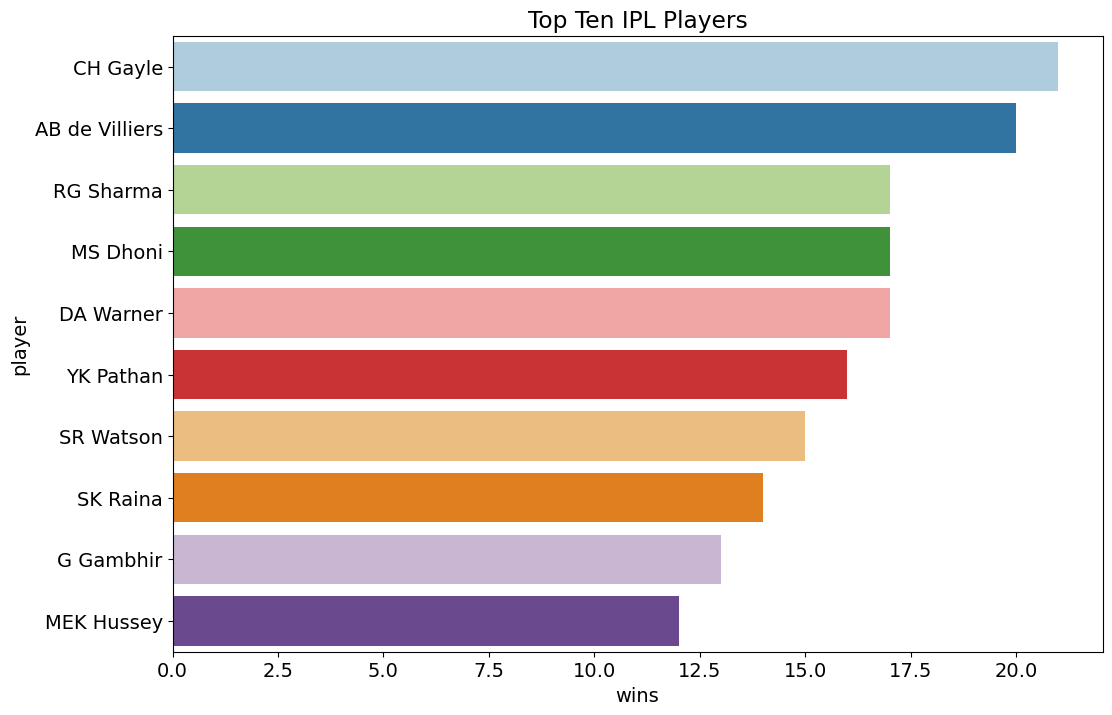

In [27]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

### Observations:

* Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
* Six Indian players have figured in the top ten IPL players list.

## The team that won the most number of toss


In [28]:
toss_ser = ipl_matches_df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [29]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


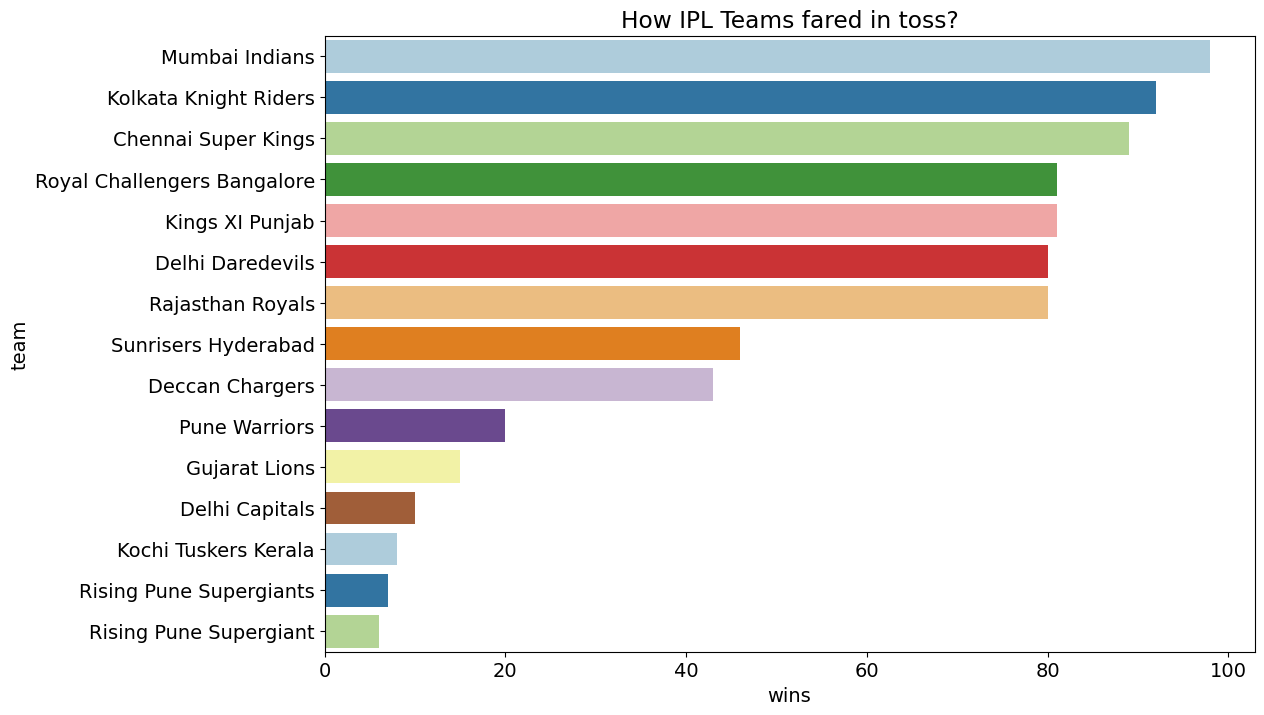

In [30]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

### Observations:

* Mumbai Indians has won the most toss(till 2019) in IPL history.
* All the top teams in IPL are successful in winning the toss as well.

## Asking and Answering Questions

Let’s try to find answers to the questions that will linger in an IPL fan’s mind. In Part I, we are dealing with some very basic questions. In Part II, we will delve deeper.

**Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?** 

We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top two players — Chris Gayle and AB de Villers have never won an IPL. **Of the top ten players, 6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL.** It exemplifies the importance of the presence of the most valuable player(s) in a team.

In [31]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


**Q2: Which umpire has officiated the most number of IPL matches on-field?**


In [32]:
umpire1_ser = ipl_matches_df['umpire1'].value_counts()
umpire2_ser = ipl_matches_df['umpire2'].value_counts()

In [33]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [34]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 

In [35]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0


**S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field**, followed by former Sri Lankan international cricketer HDPK Dharmasena.

**Q3: Which team is the most successful team in IPL?**

Nothing succeeds like success. In a game of cricket, winning is everything. We have narrowed down on the list of teams that made the most number of wins in each season. The DataFrame win_per_season_df gives the required information. Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019). Mumbai Indians won the IPL trophy in 2013, 2015, 2017, and 2019.

In [36]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


Mumbai Indians secured the most number of wins(109) in IPL, followed by Chennai Super Kings.

In [37]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


Of all the IPL matches played till 2019, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in four seasons and have won four IPL trophies so far. **Hence Mumbai Indians is the most successful team in IPL.**

**Q4: Which city has hosted the maximum number of IPL matches?**


In [38]:
ipl_matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [39]:
city_ser = ipl_matches_df['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)
    

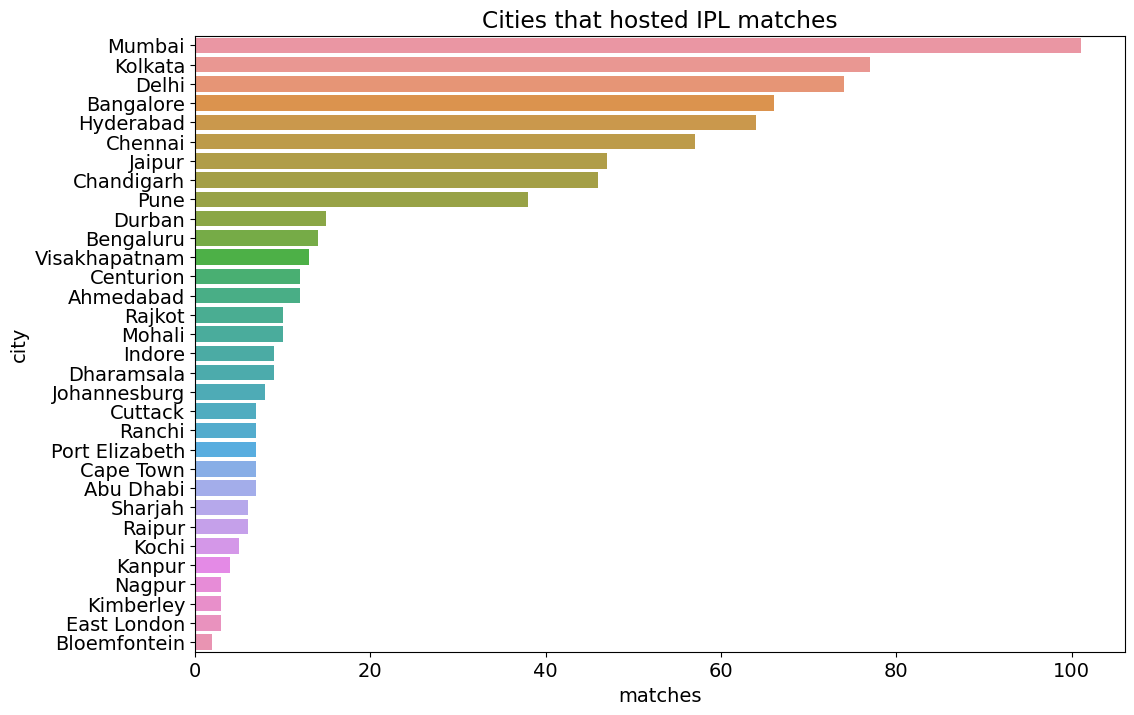

In [40]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

The city of Mumbai has hosted the maximum number of IPL matches.

**Q5: Does winning the toss has any advantage?**

In [41]:
win_count = 0
for index, value in ipl_matches_df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipl_matches_df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


**The probability of winning when the team had won the toss is 52%.** So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

**Q6: What are the major victories in IPL? Is it better to defend or chase in IPL?**

In [42]:
len(ipl_matches_df)

756

In [43]:
defend_vict_ser = ipl_matches_df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

118      1
130      1
60       1
87       1
62       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

* Of the 756 IPL matches played from 2008 to 2019, **419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.**

* **When defending a total, the biggest victory was by 146 runs.** Let’s find out that particular match.

In [44]:
score = 146
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


**The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.**

In [45]:
chasing_vict_ser = ipl_matches_df['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

* Of the 756 IPL matches played from 2008 to 2019, **350 matches were won defending the total.**

* When chasing a target, **the biggest victory was by 10 wickets**(without losing any wickets). There were 11 such instances and we can find the details about those matches by the following code snippet:

In [46]:
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [47]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


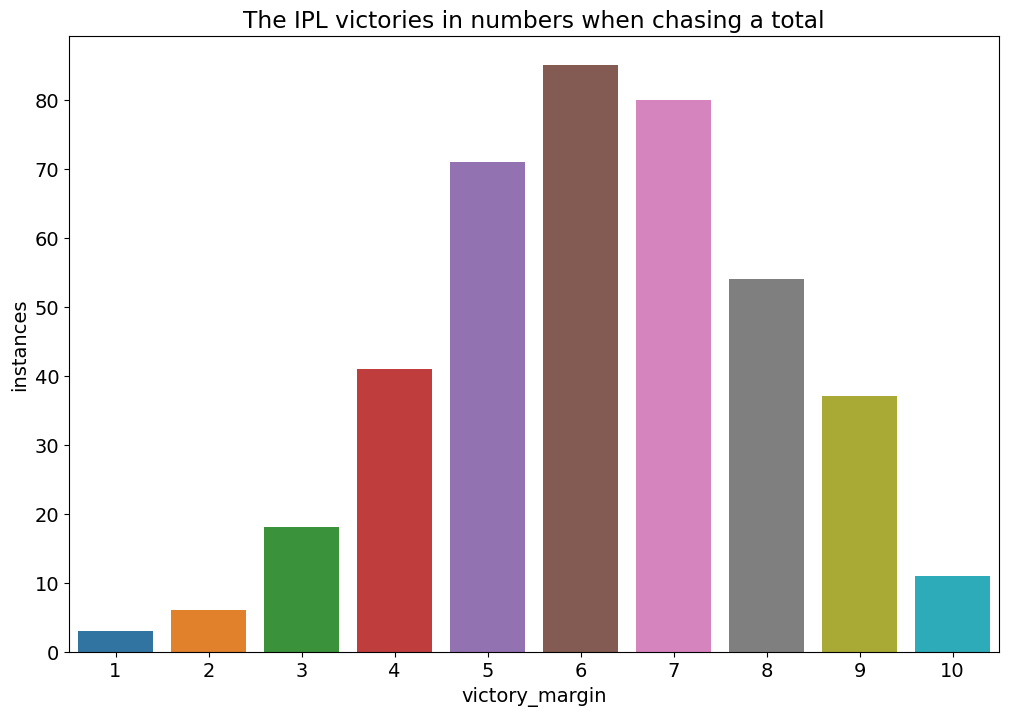

In [48]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

## Inferences and Conclusion

Let’s summarize the important observations we made during Exploratory Data Analysis:

* Mumbai Indians is the most successful team in IPL.
* Mumbai Indians has won the most number of toss.
* There were more matches won by chasing the total(419 matches) than defending(350 matches).
* When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
* When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
* The Mumbai city has hosted the most number of IPL matches.
* Chris Gayle has won the maximum number of player of the match title.
* Winning toss gives a slight edge(52% probability of winning) against the opponents.
* Five Indian players have figured in the top ten IPL players list.
* S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
* Eden Gardens has hosted the maximum number of IPL matches.
* Till 2019, 40 venues have hosted 756 IPL matches.